In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

In [2]:
zero_one_colourmap = ListedColormap(('red', 'green'))

# Plotting Decision Boundary Function

In [3]:
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                    stop = X_set[:, 0].max() + 1, 
                                     step = 0.01),
                           np.arange(start = X_set[:, 1].min() - 1, 
                                     stop = X_set[:, 1].max() + 1, 
                                     step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                                 X2.ravel()]).T).reshape(X1.shape),
                   alpha = 0.75, 
                   cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = (zero_one_colourmap)(i), label = j)
        plt.title('SVM Decision Boundary')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
    return plt.show()

# Plotting 3D Plot

In [4]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap=zero_one_colourmap)
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('y')
  return ax

# Reading the Data

In [5]:
df = pd.read_excel("SVM_Data.xlsx")

In [6]:
df.head(10)

,X1,X2,Y
0,-0.364924,0.230728,1
1,-0.293515,-0.974130,0
2,0.470622,0.966409,0
3,-0.549030,0.869911,0
4,-1.072329,-0.195141,0
5,0.020476,-0.432769,1
6,1.003240,-0.235445,0
7,-0.639111,-0.873192,0
8,0.614982,0.754834,0
9,0.168382,-0.309583,1


In [9]:
df.shape

(50, 3)

In [7]:
X = df.loc[:, ["X1", "X2"]].values
y = df.loc[:, "Y"].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Linear Classifier

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [11]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.46153846153846156

In [13]:
confusion_matrix(y_test, y_pred)

array([[0, 7],
       [0, 6]], dtype=int64)

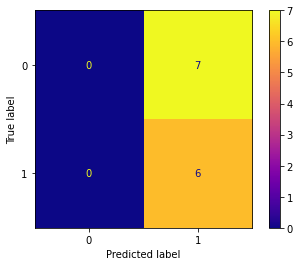

In [14]:
plot_confusion_matrix(classifier, X_test, y_test, cmap="plasma")

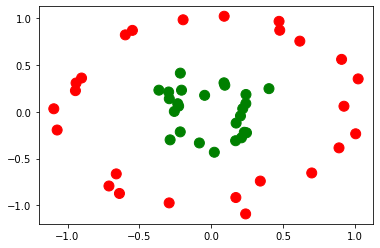

In [34]:
plt.scatter(X[:,0],X[:,1], c=y, s=100, cmap = zero_one_colourmap)
plt.show()

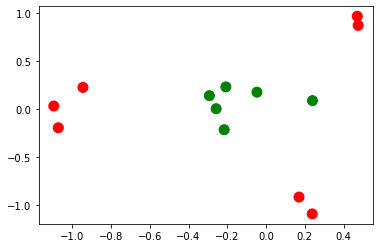

In [35]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, s=100, cmap = zero_one_colourmap)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


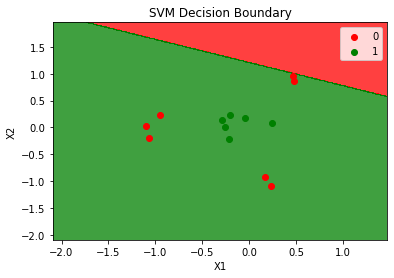

In [36]:
plot_decision_boundary(X_test, y_test, classifier)

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

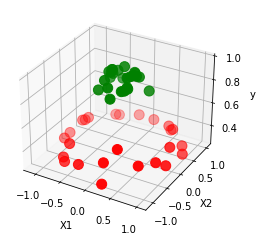

In [37]:
plot_3d_plot(X, y)

# Non Linear SVM Classifier

In [15]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

1.0

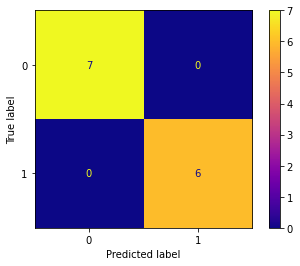

In [17]:
plot_confusion_matrix(rbf_classifier, X_test, y_test, cmap="plasma")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


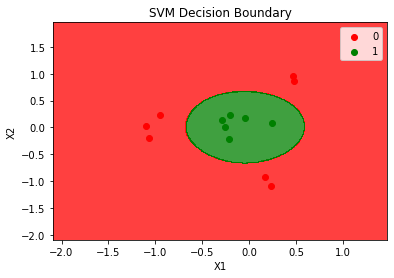

In [18]:
plot_decision_boundary(X_test, y_test, rbf_classifier)